### Section 1: 

Check the if any of the continuous environmental variables in the EFIplus_medit dataset ( Altitude, Actual_river_slope , Elevation_mean_catch , prec_ann_catch , temp_ann , temp_jan , temp_jul ) would require a data transformation in order to apply parametric tests.

In [15]:

import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots  
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()
df2.head()


<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 18 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 3.6+ MB


,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


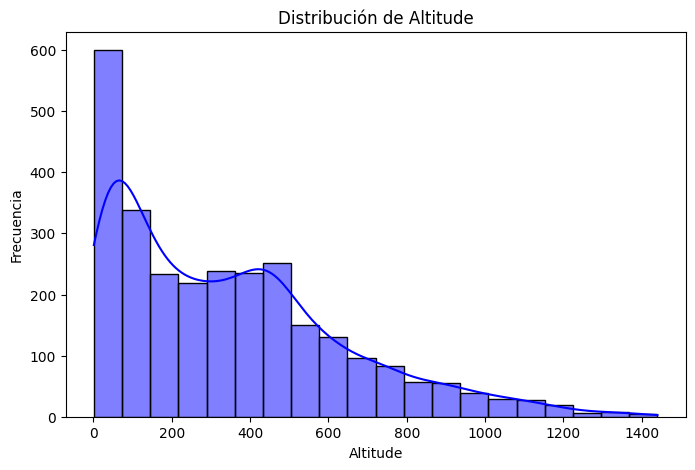

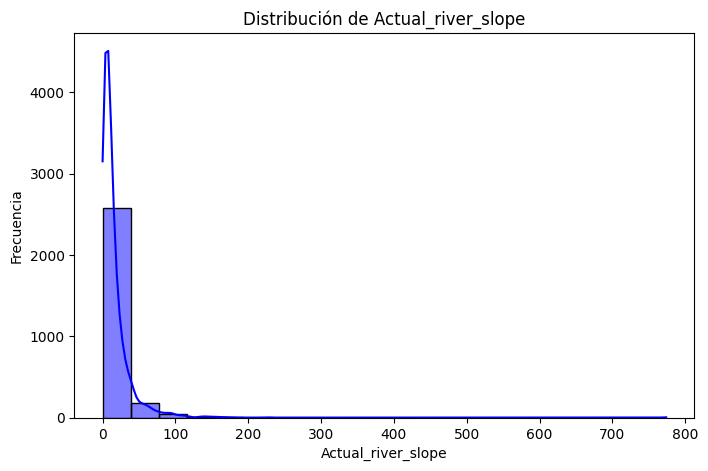

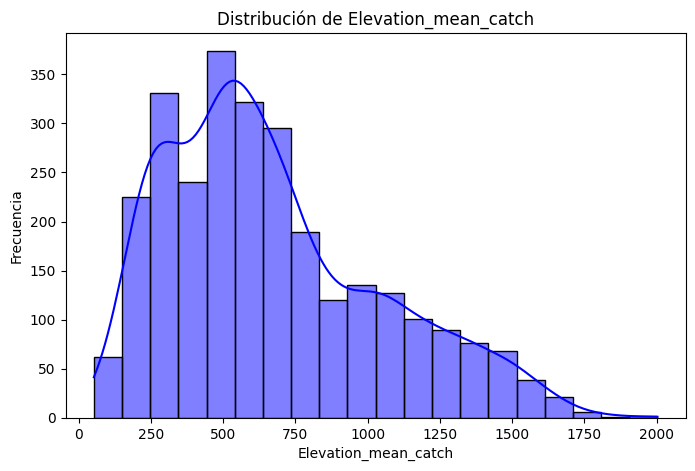

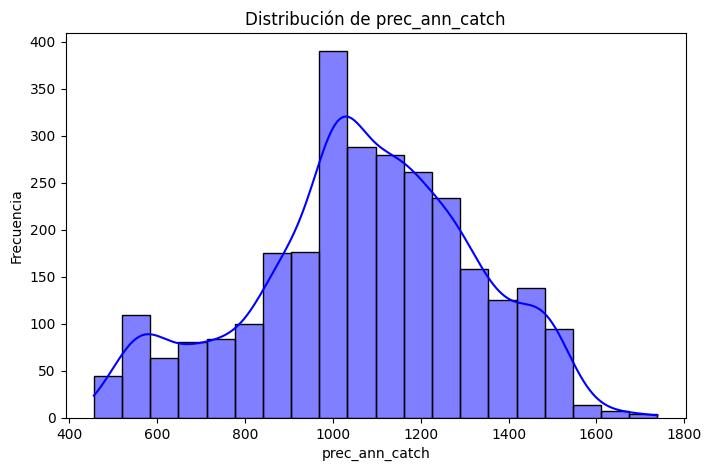

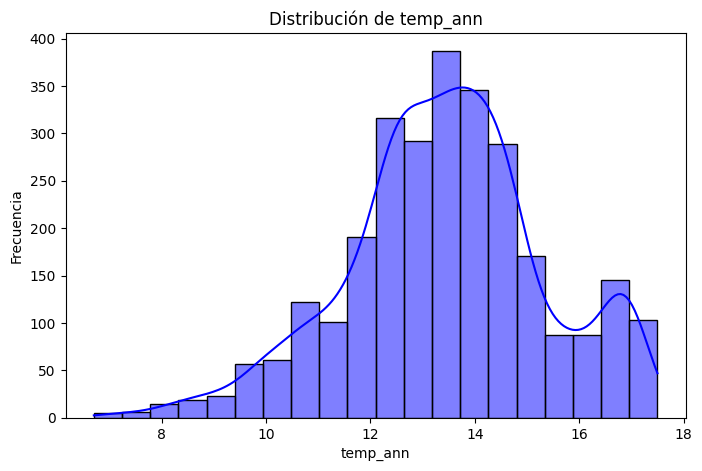

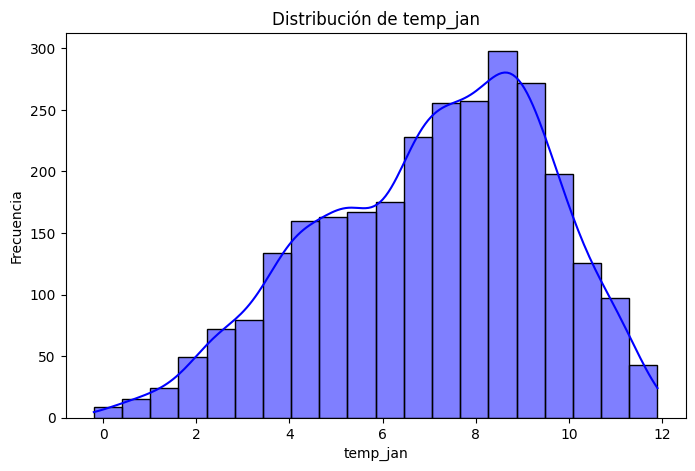

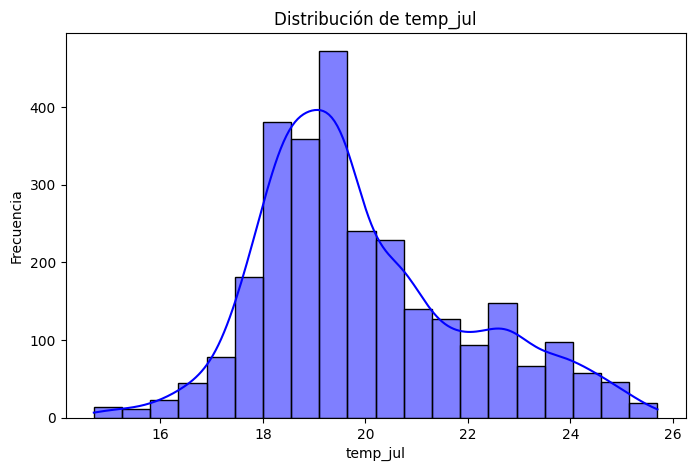

In [16]:
# Seleccionar las variables de interés
variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Visualizar la distribución de cada variable
for variable in variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(df2[variable], kde=True, color='blue', bins=20)
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

Variable: Altitude
Estadística de prueba: 0.9122411291898684, p-valor: 1.2648267178735916e-37
La muestra no parece seguir una distribución normal (se rechaza H0)



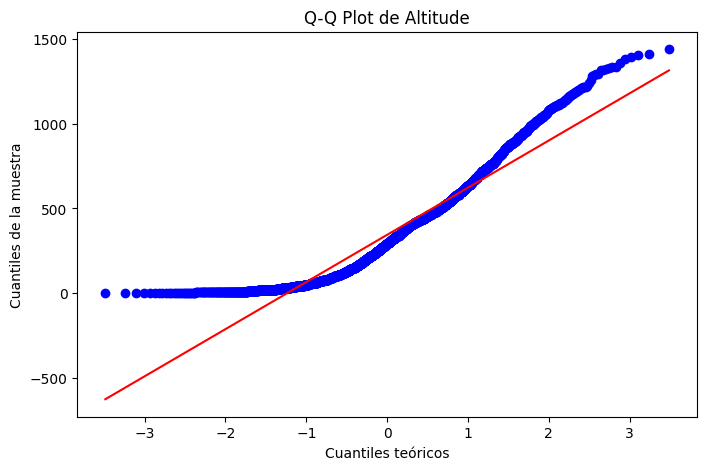


Variable: Actual_river_slope
Estadística de prueba: 0.4802035728926902, p-valor: 1.0391231937442143e-67
La muestra no parece seguir una distribución normal (se rechaza H0)



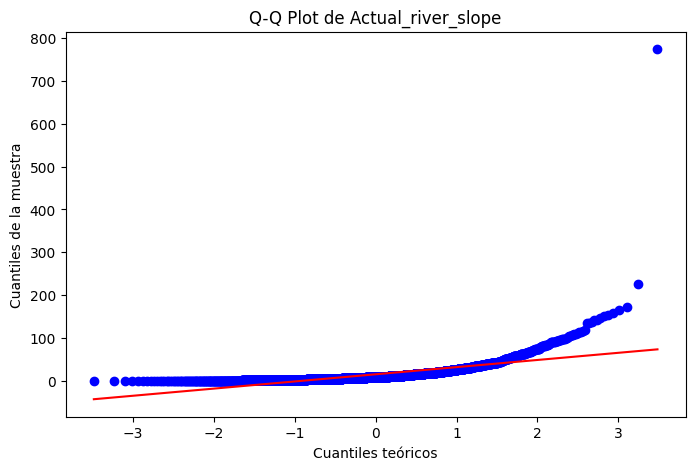


Variable: Elevation_mean_catch
Estadística de prueba: 0.9430283337553869, p-valor: 1.0981536621338652e-31
La muestra no parece seguir una distribución normal (se rechaza H0)



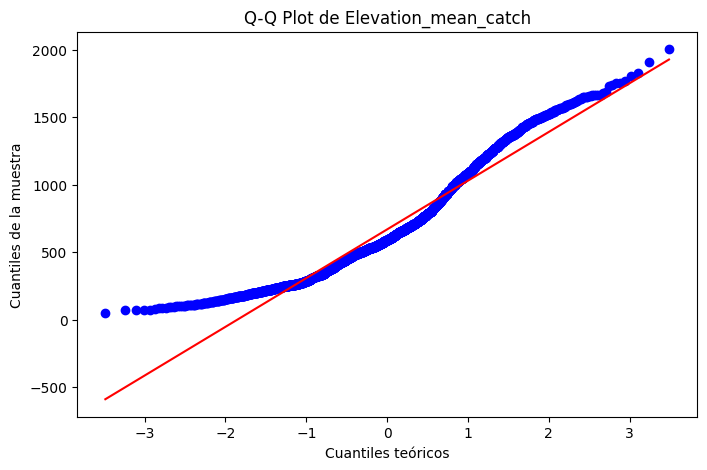


Variable: prec_ann_catch
Estadística de prueba: 0.9844618927912208, p-valor: 4.866595357383943e-17
La muestra no parece seguir una distribución normal (se rechaza H0)



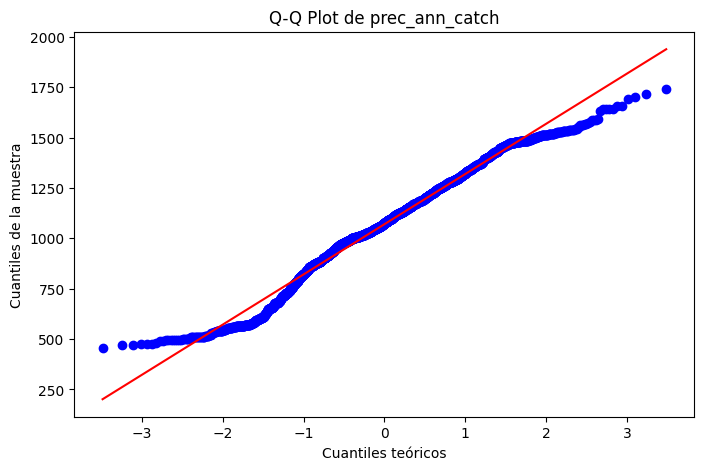


Variable: temp_ann
Estadística de prueba: 0.9857130512505073, p-valor: 2.939041820637077e-16
La muestra no parece seguir una distribución normal (se rechaza H0)



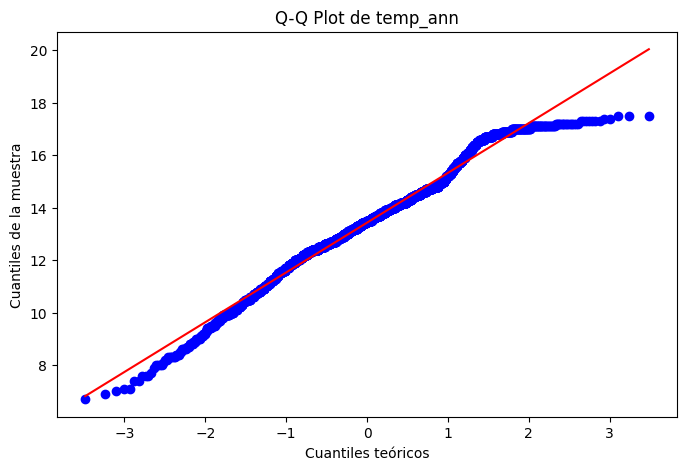


Variable: temp_jan
Estadística de prueba: 0.9775667488525981, p-valor: 1.0842459978798965e-20
La muestra no parece seguir una distribución normal (se rechaza H0)



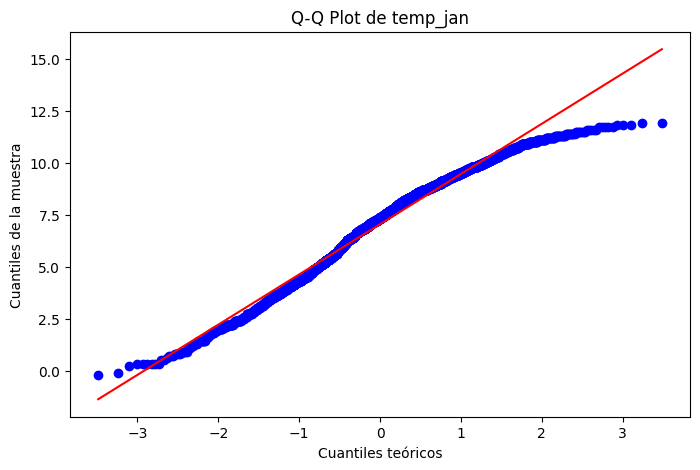


Variable: temp_jul
Estadística de prueba: 0.9561054493936108, p-valor: 2.326362105514345e-28
La muestra no parece seguir una distribución normal (se rechaza H0)



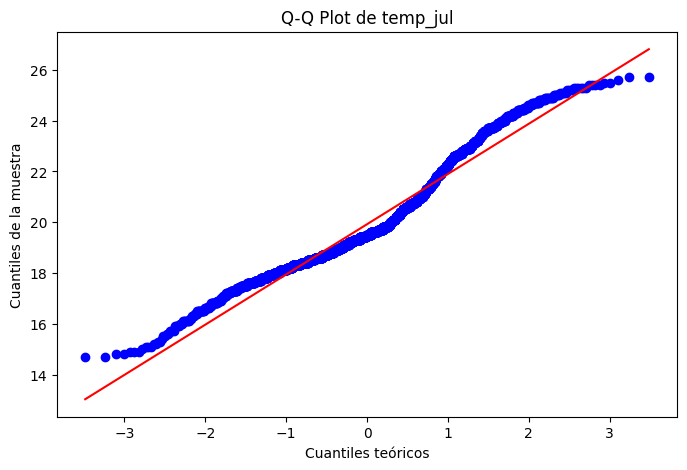

In [17]:
from scipy.stats import shapiro
from scipy.stats import shapiro, probplot

# Seleccionar las variables de interés
variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Realizar prueba de normalidad (Shapiro-Wilk) para cada variable
for variable in variables:
    stat, p = shapiro(df2[variable])
    alpha = 0.05
    print(f'Variable: {variable}')
    print(f'Estadística de prueba: {stat}, p-valor: {p}')
    if p > alpha:
        print('La muestra parece seguir una distribución normal (no se puede rechazar H0)')
    else:
        print('La muestra no parece seguir una distribución normal (se rechaza H0)')
    print()

    # Q-Q plot
    plt.figure(figsize=(8, 5))
    probplot(df2[variable], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {variable}')
    plt.xlabel('Cuantiles teóricos')
    plt.ylabel('Cuantiles de la muestra')
    plt.show()
    print()


### Section 2: Apply the appropriate data transformation and check the new distributions.

In [18]:
import numpy as np


# Seleccionar las variables de interés
variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']


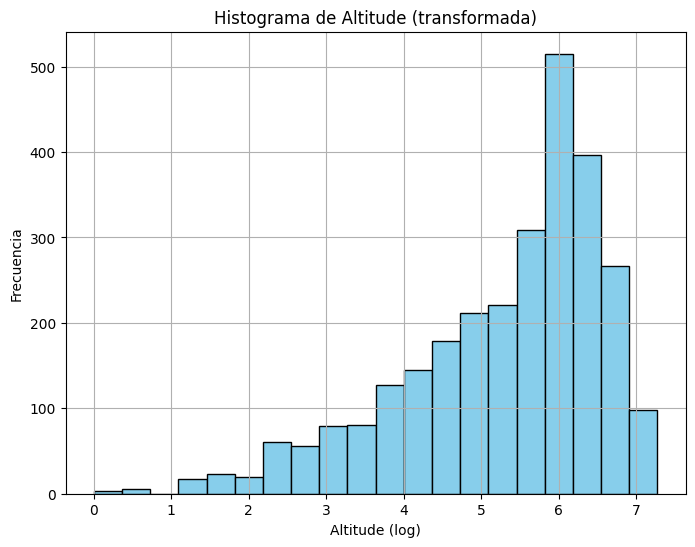

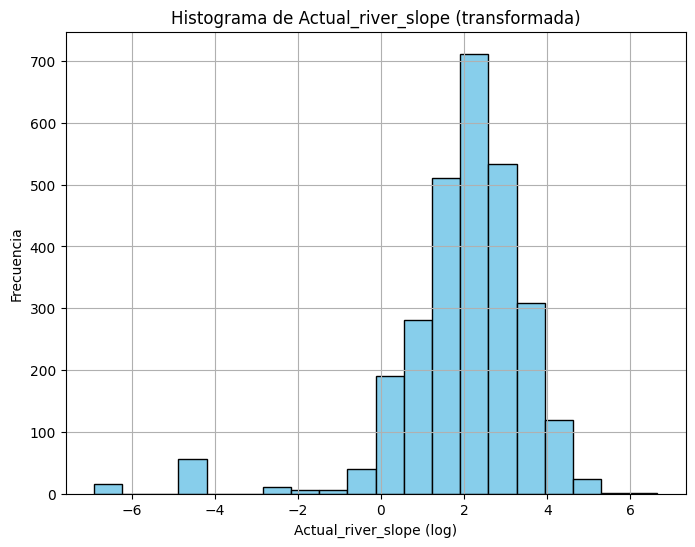

     Site_code   Latitude  Longitude Country Catchment_name  Galiza  \
18  ES_03_0001  41.957268  -2.926857   Spain          Douro       0   
19  ES_03_0002  41.850818  -2.591150   Spain          Douro       0   
28  ES_03_0012  41.498026  -5.528753   Spain          Douro       0   
32  ES_03_0016  41.586853  -3.072064   Spain          Douro       0   
43  ES_03_0029  41.830177  -3.782420   Spain          Douro       0   

    Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
18          1                1              1             1  ...   
19          1                0              1             0  ...   
28          1                0              1             0  ...   
32          1                0              1             0  ...   
43          1                0              1             0  ...   

    Squalius malacitanus  Squalius pyrenaicus  Squalius torgalensis  \
18                     0                    0                     0   
19                    

In [20]:
import numpy as np


# Loop a través de cada variable en la lista variables
for column in variables:
    # Aplicar la transformación logarítmica a la columna actual
    transformed_data = np.log(df2[column])
    
    # Crear subplots para organizar los gráficos lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Trama del histograma del dato original (no normalizado)
    sns.histplot(df2[column], kde=True, color='blue', label="Original", ax=axes[0])
    axes[0].set_title(f'Histograma de {column} (Original)')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frecuencia')
    axes[0].legend(loc="upper right")

    # Trama del histograma del dato transformado (normalizado)
    sns.histplot(transformed_data, kde=True, color='purple', label="Transformado", ax=axes[1])
    axes[1].set_title(f'Histograma de {column} (Transformado)')
    axes[1].set_xlabel(f'{column} (Transformado)')
    axes[1].set_ylabel('Frecuencia')
    axes[1].legend(loc="upper right")

    # Ajustar el espacio entre subplots
    plt.tight_layout()
    
    # Mostrar los gráficos
    plt.show()



### Section 3: 

Create a column with the total number of species present (the species richness) in each sampling site (the first species in the dataset is Abramis brama ’ and all the columns to the right are all species).

In [ ]:
# Crear una nueva columna llamada 'species_richness' que almacene la suma de especies presentes en cada fila
df2['species_richness'] = df.iloc[:, 56:].gt(0).sum(axis=1)

# Mostrar las primeras filas del DataFrame con la nueva columna 'species_richness'
df2.head(10)




C:\Users\jesus\AppData\Local\Temp\ipykernel_22940\398290217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['species_richness'] = df.iloc[:, 56:].gt(0).sum(axis=1)


,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp,species_richness
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,6
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,6
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,7
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,8
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,7
44,ES_03_0030,41.689960,-4.531718,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,7
60,ES_03_0046,42.689234,-5.355963,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,4
66,ES_03_0053,42.108548,-6.659982,Spain,Douro,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,7
71,ES_03_0058,41.503202,-4.026422,Spain,Douro,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,5
91,ES_04_0002,42.855826,-4.440717,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,5


### Section 4: 
Check the existence of bivariate outliers in the relationship between Mean Annual Temperature ('temp_ann') and species richness using an appropriate plot. Run a bivariate isolation forest to detect outliers and plot the result.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from sklearn.ensemble import IsolationForest

In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd

df2_2 = df2

# Define el modelo de Isolation Forest con 150 árboles, 'contamination' automático y 2 características máximas
model = IsolationForest(n_estimators=150, contamination='auto', max_features=2)

# Ajusta el modelo a las características 'species_richness' y 'temp_ann' del DataFrame df2
model.fit(df2_2[['species_richness', 'temp_ann']].values)

# Extrae las puntuaciones de anomalía del modelo (puntuaciones medias de anomalía de cada árbol)
scores = model.decision_function(df2_2[['species_richness', 'temp_ann']].values)

# Extrae un identificador de anomalía (valores atípicos) (-1)
anomaly = model.predict(df2_2[['species_richness', 'temp_ann']].values)

# Añade una nueva columna al DataFrame con las puntuaciones de anomalía
df2_2['scores'] = scores

# Añade una nueva columna al DataFrame con el identificador de anomalía (1/-1)
df2_2['anomaly'] = anomaly

# Cuenta el número de valores atípicos mediante una tabla cruzada
outlier_counts = pd.crosstab(df2_2['anomaly'], columns='count')
print(outlier_counts)


col_0    count
anomaly       
-1         739
 1        2083


C:\Users\jesus\AppData\Local\Temp\ipykernel_22940\949260630.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_2['scores'] = scores
C:\Users\jesus\AppData\Local\Temp\ipykernel_22940\949260630.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_2['anomaly'] = anomaly


c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


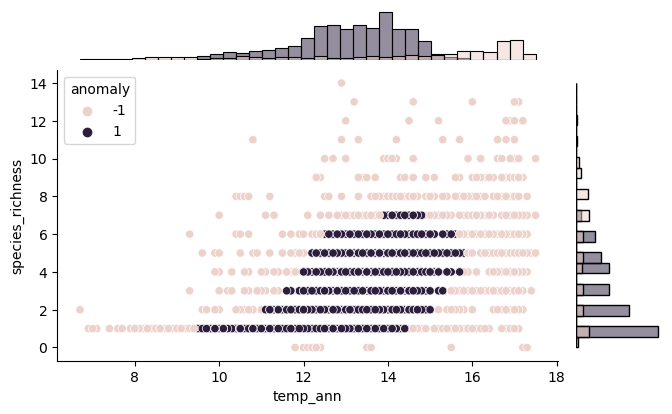

In [ ]:
g = sns.JointGrid(data=df2_2, x='temp_ann', y='species_richness', hue='anomaly') 
g.plot(sns.scatterplot, sns.histplot) # to plot both a scatter plot and a boxplot for each variable
g.ax_marg_x.set_axis_off() # removes the marginal x-axis
g.ax_marg_y.set_axis_off() # removes the marginal y-axis
g.fig.set_figwidth(7) # to define the width to get a non-square figure with JointGrid 
g.fig.set_figheight(4) # to define the height to get a non-square figure with JointGrid 
plt.show()